<a href="https://colab.research.google.com/github/alvinsenjaya/TomatoPlantDiseases/blob/master/Base_InceptionResNetV2.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# **Import Required Libraries**

In [0]:
import os
import tensorflow as tf
import keras_preprocessing
from keras_preprocessing import image
from keras_preprocessing.image import ImageDataGenerator
import matplotlib.pyplot as plt

# **Download Dataset**

In [0]:
os.environ['KAGGLE_USERNAME']="xxxxx"
os.environ['KAGGLE_KEY']="xxxxxxxxxxxxxxxxxxxxxx"

In [0]:
!kaggle datasets download noulam/tomato

 99% 738M/743M [00:21<00:00, 60.8MB/s]
100% 743M/743M [00:21<00:00, 35.5MB/s]


In [0]:
!unzip tomato.zip

# **Image Preprocessing**

In [2]:
TRAINING_DIR = '/content/New Plant Diseases Dataset(Augmented)/train/'
training_datagen = ImageDataGenerator(
    rescale = 1./255,
    rotation_range=90,
    width_shift_range=0.2,
    height_shift_range=0.2,
    shear_range=0.2,
    zoom_range=0.2,
    horizontal_flip=True,
    fill_mode='nearest')

VALIDATION_DIR = '/content/New Plant Diseases Dataset(Augmented)/valid/'
validation_datagen = ImageDataGenerator(rescale = 1./255)

train_generator = training_datagen.flow_from_directory(
    TRAINING_DIR,
    target_size=(256,256),
    class_mode='categorical',
    batch_size=128
)

validation_generator = validation_datagen.flow_from_directory(
    VALIDATION_DIR,
    target_size=(256,256),
    class_mode='categorical',
    batch_size=128
)

Found 18345 images belonging to 10 classes.
Found 4585 images belonging to 10 classes.


# **Define Machine Learning Model**

In [3]:
base_model = tf.keras.applications.InceptionResNetV2(weights='imagenet', include_top=False, input_shape=(256,256,3))

print("Number of layers in the base model: ", len(base_model.layers))

219062272/219055592 [==============================] - 8s 0us/step
Number of layers in the base model:  780


In [4]:
for i, layer in enumerate(base_model.layers):
  print(i, layer.name)

0 input_1
1 conv2d
2 batch_normalization
3 activation
4 conv2d_1
5 batch_normalization_1
6 activation_1
7 conv2d_2
8 batch_normalization_2
9 activation_2
10 max_pooling2d
11 conv2d_3
12 batch_normalization_3
13 activation_3
14 conv2d_4
15 batch_normalization_4
16 activation_4
17 max_pooling2d_1
18 conv2d_8
19 batch_normalization_8
20 activation_8
21 conv2d_6
22 conv2d_9
23 batch_normalization_6
24 batch_normalization_9
25 activation_6
26 activation_9
27 average_pooling2d
28 conv2d_5
29 conv2d_7
30 conv2d_10
31 conv2d_11
32 batch_normalization_5
33 batch_normalization_7
34 batch_normalization_10
35 batch_normalization_11
36 activation_5
37 activation_7
38 activation_10
39 activation_11
40 mixed_5b
41 conv2d_15
42 batch_normalization_15
43 activation_15
44 conv2d_13
45 conv2d_16
46 batch_normalization_13
47 batch_normalization_16
48 activation_13
49 activation_16
50 conv2d_12
51 conv2d_14
52 conv2d_17
53 batch_normalization_12
54 batch_normalization_14
55 batch_normalization_17
56 activa

In [0]:
base_model.trainable = True

fine_tune_at = 618
for layer in base_model.layers[:fine_tune_at]:
  layer.trainable =  False

In [6]:
model = tf.keras.models.Sequential([
  base_model,
  tf.keras.layers.Dropout(0.5),
  tf.keras.layers.Flatten(),
  tf.keras.layers.Dense(512, activation='relu'),
  tf.keras.layers.Dense(10, activation='softmax')
])

model.summary()

Model: "sequential"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
inception_resnet_v2 (Model)  (None, 6, 6, 1536)        54336736  
_________________________________________________________________
dropout (Dropout)            (None, 6, 6, 1536)        0         
_________________________________________________________________
flatten (Flatten)            (None, 55296)             0         
_________________________________________________________________
dense (Dense)                (None, 512)               28312064  
_________________________________________________________________
dense_1 (Dense)              (None, 10)                5130      
Total params: 82,653,930
Trainable params: 51,859,210
Non-trainable params: 30,794,720
_________________________________________________________________


# **Define Learning Parameter**

In [0]:
model.compile(loss = 'categorical_crossentropy', optimizer='adam', metrics=['accuracy'])

# **Begin Training**

In [8]:
history = model.fit(train_generator, epochs=20, validation_data=validation_generator)

Epoch 1/20
144/144 [==============================] - 357s 2s/step - loss: 2.6421 - accuracy: 0.4792 - val_loss: 2983.8701 - val_accuracy: 0.1832
Epoch 2/20
144/144 [==============================] - 353s 2s/step - loss: 0.4949 - accuracy: 0.8325 - val_loss: 0.4872 - val_accuracy: 0.8379
Epoch 3/20
144/144 [==============================] - 354s 2s/step - loss: 0.2561 - accuracy: 0.9209 - val_loss: 1.4374 - val_accuracy: 0.8763
Epoch 4/20
144/144 [==============================] - 353s 2s/step - loss: 0.1724 - accuracy: 0.9438 - val_loss: 0.2144 - val_accuracy: 0.9324
Epoch 5/20
144/144 [==============================] - 352s 2s/step - loss: 0.2679 - accuracy: 0.9377 - val_loss: 0.7818 - val_accuracy: 0.7863
Epoch 6/20
144/144 [==============================] - 352s 2s/step - loss: 0.1538 - accuracy: 0.9500 - val_loss: 0.3916 - val_accuracy: 0.8811
Epoch 7/20
144/144 [==============================] - 351s 2s/step - loss: 0.1091 - accuracy: 0.9627 - val_loss: 0.1893 - val_accuracy: 0.9

# **Plot Training Results**

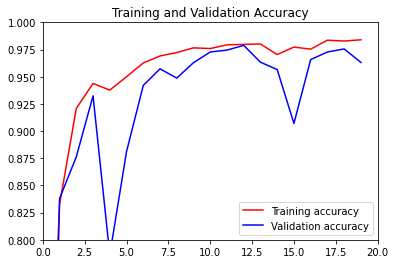

<Figure size 432x288 with 0 Axes>

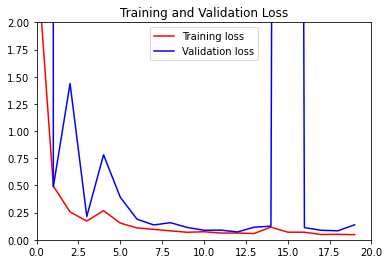

<Figure size 432x288 with 0 Axes>

In [10]:
acc = history.history['accuracy']
val_acc = history.history['val_accuracy']
loss = history.history['loss']
val_loss = history.history['val_loss']

epochs = range(len(acc))

plt.ylim(0.8, 1)
plt.xlim(0, 20)
plt.plot(epochs, acc, 'r', label='Training accuracy')
plt.plot(epochs, val_acc, 'b', label='Validation accuracy')
plt.title('Training and Validation Accuracy')
plt.legend(loc=0)
plt.figure()
plt.show()

plt.ylim(0, 2)
plt.xlim(0, 20)
plt.plot(epochs, loss, 'r', label='Training loss')
plt.plot(epochs, val_loss, 'b', label='Validation loss')
plt.title('Training and Validation Loss')
plt.legend(loc=0)
plt.figure()
plt.show()

# **Save Model**

In [11]:
export_path = "/content/saved_model"

try: 
  os.mkdir(export_path) 
except OSError as error: 
  print(error) 

tf.keras.models.save_model(
    model,
    export_path,
    overwrite=True,
    include_optimizer=True,
    save_format=None,
    signatures=None,
    options=None
)

print('\nSaved model:')
!ls -l {export_path}

[Errno 17] File exists: '/content/saved_model'
Instructions for updating:
If using Keras pass *_constraint arguments to layers.
INFO:tensorflow:Assets written to: /content/saved_model/assets

Saved model:
total 17220
drwxr-xr-x 2 root root     4096 May 31 04:17 assets
-rw-r--r-- 1 root root 17623711 May 31 06:29 saved_model.pb
drwxr-xr-x 2 root root     4096 May 31 06:29 variables


# **Download Saved Model**

In [12]:
!zip -r /content/saved_model_inceptionresnetv2.zip /content/saved_model

  adding: content/saved_model/ (stored 0%)
  adding: content/saved_model/saved_model.pb (deflated 93%)
  adding: content/saved_model/assets/ (stored 0%)
  adding: content/saved_model/variables/ (stored 0%)
  adding: content/saved_model/variables/variables.index (deflated 79%)
  adding: content/saved_model/variables/variables.data-00000-of-00002 (deflated 83%)
  adding: content/saved_model/variables/variables.data-00001-of-00002 (deflated 18%)


In [0]:
files.download("/content/saved_model_inceptionresnetv2.zip")

# **Save to Google Drive**

In [0]:
from google.colab import drive
drive.mount('/content/gdrive/')

In [0]:
!cp saved_model_inceptionresnetv2.zip '/content/gdrive/My Drive/Saved Model/'

# **Upload Saved Model**

In [0]:
uploaded = files.upload()
!unzip /content/saved_model_inceptionresnetv2.zip
model = tf.keras.models.load_model('/content/saved_model/')
model.summary()

# **Upload Saved Model From Google Drive**

In [0]:
from google.colab import drive
drive.mount('/content/gdrive/')

In [0]:
!cp '/content/gdrive/My Drive/Saved Model/saved_model_inceptionresnetv2.zip' /content/
!unzip /content/saved_model_inceptionresnetv2.zip
model = tf.keras.models.load_model('/content/saved_model/')
model.summary()

# **Try Classification**

In [14]:
from google.colab import files

file = files.upload()

img = image.load_img(list(file.keys())[0], target_size=(256, 256))
img = image.img_to_array(img)
img = img.reshape(1, 256, 256, 3)
img = img.astype('float32')
img = img / 255.0
result = model.predict(img)
result = list(result[0]).index(max(result[0]))

print("\n\nResult :")

if result == 0:
  print("Bacterial Spot")
elif result == 1:
  print("Early Blight")
elif result == 2:
  print("Late Blight")
elif result == 3:
  print("Leaf Mold")
elif result == 4:
  print("Septoria Leaf Spot")
elif result == 5:
  print("Spider Mites")
elif result == 6:
  print("Target Spot")
elif result == 7:
  print("Yellow Leaf Curl Virus")
elif result == 8:
  print("Mosaic Virus")
else:
  print("Healthy")

Saving datasets_259770_544347_New Plant Diseases Dataset(Augmented)_train_Tomato___Bacterial_spot_00416648-be6e-4bd4-bc8d-82f43f8a7240___GCREC_Bact.Sp 3110.jpg to datasets_259770_544347_New Plant Diseases Dataset(Augmented)_train_Tomato___Bacterial_spot_00416648-be6e-4bd4-bc8d-82f43f8a7240___GCREC_Bact.Sp 3110.jpg


Result :
Bacterial Spot
